# Assignment 3 Part 1: SA

### This notebook contains two sections: 

### 1. The first is a brief tutorial on building a simple sentiment analyser on some toy data and is not marked. 

### 2. The second section contains questions for you to answer and is marked.

Tutorial: Sentiment Analysis on some textual data
===

Introduction and setup
---

The purpose of this tutorial is to guide you through the construction of a very basic sentiment analysis tool.
We aim at detecting the polarity of a given text: is the attitude of the writer **positive** or **negative**.
Texts such as `'This view is amazing'` are considered positive, whereas text as `'This view is horrible'` will be considered negative. Such a tool can be useful, for example, to detect if products reviews are positive or negative.
The tool that we will construct starts from a very simple hypothesis: *it a text contains mainly positive words, then the general sentiment is positive; if the text contains mainly negative words, then the sentiment is negative*.

**Step 1:** For this purpose, we will use a sentiment lexicon: a list of words together with their polarity (*i.e.*, positive or negative).
We use the lexicon described in 
`Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA.`,
and available for [download here](http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html).  
  
In order to speed up this tutorial, we have downloaded the lexicon and pre-treated it (*i.e.*, we removed the header).
Save into your current folder the two lexicon files: `sentiment-lexicon-positive-words.txt` and `sentiment-lexicon-negative-words.txt` (available on Wattle).
Please note that some words in the lexicon are intentionally misspelled in order to accommodate common errors found in social media.

**Step 2:** We will require to verify if the words in the target text belong to the negative or to the positive lexicon.
For this, we use the Python's powerful [NLTK (Natural Language Toolkit) module](http://www.nltk.org/).
NLTK contains a comprehensive number of tools needed for natural text processing: tokenizers, stemmers, lemmatizers *etc.*
In the following, we will use a tokenizer (a tool which splits natural language text into tokens - words) and a lemmatizer (a tool to reduce a word to its lemma - singular, masculine form for nouns, infinitive for verbs *etc.*).

If you followed the installation instructions (or if you are working on a lab computer), the *nltk* module should already be installed, alongside with the additional required data that the tokenizer requires.
If you work on your own laptop, you need to download this additional data by executing the code below.
This will require a download of 23.3MB.  

In [24]:
import nltk
import numpy as np

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We are now set up to start building our sentiment analysis tool.

Constructing a basic Sentiment Analysis tool
---

We start by initializing a set of positive and negative examples to work with. The examples were taken from [this sentiment analysis tutorial](http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/).

In [25]:
pos_tweets = [ 'I love this cars',
               'This view is amazing',
	           'I feel great this morning',
	           'I am so excited about the concert',
	           'He is my best friend']

neg_tweets = ['I do not like this car',
              'This view is horrible',
              'I feel tired this morning',
              'I am not looking forward to the concert',
              'He is my worst enemy']

Next, we import the positive and the negative lexicons.
The format of the lexicon files is one word per line.
As we will lemmatize the words in the target text, we apply the same treatment to the words in the lexicon.

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer

# define the lemmatizer
lmtzr = WordNetLemmatizer()

# read the positive and negative lexicon in lists of words
positive_words = [lmtzr.lemmatize(line.strip()) for line in open('sentiment-lexicon-positive-words.txt')]
negative_words = [lmtzr.lemmatize(line.strip()) for line in open('sentiment-lexicon-negative-words.txt')]

print(f'We have {len(positive_words)} positive words and {len(negative_words)} negative words.')

We have 2006 positive words and 4783 negative words.


We are going to preprocess the target texts:
* the text is split into tokens (words) by using **nltk**;
* each token is transformed to lowercase;
* tokens are lemmatized;
* tokens with fewer than 3 characters are filtered out, since there are likely to be errors or non-sentiment related words.

In [27]:
for words in pos_tweets + neg_tweets:
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(words)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    
    # print the tweet
    print(tweet)

['love', 'this', 'car']
['this', 'view', 'amazing']
['feel', 'great', 'this', 'morning']
['excited', 'about', 'the', 'concert']
['best', 'friend']
['not', 'like', 'this', 'car']
['this', 'view', 'horrible']
['feel', 'tired', 'this', 'morning']
['not', 'looking', 'forward', 'the', 'concert']
['worst', 'enemy']


In the end, for each text we compute a score:
* if a given word is in the positive list, we add one to the score;
* if the word is in the negative list, we subtract one from the score.

In the end, if the score is greater than zero, the text is considered as positive. 
If it is less than zero, it is considered negative. 
If it is zero, the text is considered neutral.

The following code finds and outputs the positive and negative words in the texts. 
It computes the score and prints it out for each text.

In [28]:
# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in tweet:
        if word in positive_words:
            score = score + 1
            #print "+1", word
        if word in negative_words:
            score = score - 1
            #print "-1", word
    
    return score

# apply it on our example tweets
for words in pos_tweets + neg_tweets:
    print(f'Tweet: "{words}", score: {get_sentiment_score(words)}')
    print('------------------------------------')

Tweet: "I love this cars", score: 1
------------------------------------
Tweet: "This view is amazing", score: 1
------------------------------------
Tweet: "I feel great this morning", score: 1
------------------------------------
Tweet: "I am so excited about the concert", score: 1
------------------------------------
Tweet: "He is my best friend", score: 1
------------------------------------
Tweet: "I do not like this car", score: 1
------------------------------------
Tweet: "This view is horrible", score: -1
------------------------------------
Tweet: "I feel tired this morning", score: -1
------------------------------------
Tweet: "I am not looking forward to the concert", score: 0
------------------------------------
Tweet: "He is my worst enemy", score: -2
------------------------------------


We observe that all the positive examples have been detected as positive, because they contain positive words.
Only 3 out of 5 negative examples were detected as such.
In the case of *'I do not like this car'*, the word **like** is in the positive list, but in the text it is prefixed by **not** which changes the polarity.
**like** is positive, but **not like** is negative.
*'I am not looking forward to the concert'* does not contain any positive or negative words, even if the expression **not looking forward** has a negative connotation.
This shows the limitations of our naive approach.
These special cases should be taken into account.

## Loading the Twitter dataset
To answer the assignment questions you will run your sentiment analyse on a dataset scraped from the Twitter API. This dataset is found in the twitter-dump.json.bz2 file, where each line is a single tweet.

This data can be loaded into a python dict as follows:

In [29]:
import bz2, json

with bz2.BZ2File("./twitter-dump.json.bz2", mode="r") as reader:
    jobj = [json.loads(line) for line in reader.readlines()]

# Remove tweets with duplicate text
unique_texts = set()
unique_tweets = []
for t in jobj:
    if t['text'] in unique_texts:
        continue
    unique_texts.add(t['text'])
    unique_tweets.append(t)
jobj = unique_tweets
    
sample = jobj[0]
print(json.dumps(sample, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "YoutubeID": "iS1g8G_njx8",
    "_id": {
        "$oid": "5398013792ccfc23ee6f74c7"
    },
    "contributors": null,
    "coordinates": null,
    "created_at": {
        "$date": "2014-05-30T22:55:45.000+0200"
    },
    "entities": {
        "hashtags": [
            {
                "indices": [
                    70,
                    89
                ],
                "text": "WatchProblemOnVEVO"
            },
            {
                "indices": [
                    90,
                    103
                ],
                "text": "problemvideo"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "youtu.be/iS1g8G_njx8",
                "expanded_url": "http://youtu.be/iS1g8G_njx8",
                "indices": [
                    42,
                    64
                ],
                "url": "http://t.co/ji6ETHIFuf"
            }
        ],
        "user_mentions": [
            {
            

The meaning of the different fields are described [here](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).
Let's take a look at some of the most important fields for our application:
* **created_at** - represents the date at each the tweet was emitted. Here: "2014-05-30T22:55:45.000+0200";
* **text** - is the actual text of the tweet. Here: "RT @ArianaGrande: here it is y'all ...... http://t.co/ji6ETHIFuf #WatchProblemOnVEVO #problemvideo";
* **user** - information about the user that emitted the tweet. The field that we will be using is **id**, the id of the user. Here: '2556502655';
* **in_reply_to_user_id** - the id of the user to which this tweets replies to. Here: null, hence this tweet is not a reply;
* **retweeted_status** - encloses the tweet that the current tweet retweets. Here: this tweet is a retweet;
* **YoutubeID** - the id of the Youtube video that the tweet is connected to. The text of the tweet contains a(n) (shortened) URL towards this video, such as 'iS1g8G_njx8'.

# <span style="color:blue"> Assignment Questions (5 marks): Applying the analysis on real Twitter data</span>

### Question 1 (1 point)

Use the `get_sentiment_score(text)`, the sentiment scoring function defined before, and calculate the sentiment polarity of the tweets in the Twitter JSON dataset (jobj). 
Print the text of the 10 most positive tweets and the 10 most negative tweets. 
We consider that a tweet $t_1$ is more positive than another tweet $t_2$ when score of the former is higher than the score of the latter ($score(t_1) > score(t_2)$). 
Similarly, a tweet $t_1$ is more negative than $t_2$ when $score(t_1) < score(t_2)$.  

In [30]:
# YOUR CODE HERE
def get_sentiment_score(unique_texts):
    tokens = nltk.word_tokenize(unique_texts)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in tweet:
        if word in positive_words:
            score = score + 1
        if word in negative_words:
            score = score - 1
    return score

dict1 = {}
k = np.zeros(len(jobj))

for i in range(len(jobj)):
    unique_texts = jobj[i]['text']
    k[i] = get_sentiment_score(unique_texts)
    dict1[unique_texts] = k[i]
sorted_dict = sorted(dict1.items(), key = lambda x : x[1])
sorted_dict1 = sorted(dict1.items(), key = lambda x : x[1], reverse = True)

print("Most Negative tweets:",sorted_dict[:10])
print("--------------------------------------------------------------------------------------------------------------")
print("Most Positive tweets:",sorted_dict1[:10])

Most Negative tweets: [('@ArianaGrande Problem slays my life. Problem slays your life. Problem over everything. Problem slays. https://t.co/b0jyBCGpXn', -4.0), ('RT @zaynmgirl: one less problem without ya I got one less problem without ya I got one less problem without ya https://t.co/0tLoIbAVcc', -3.0), ('Ariana Grande - Problem ft. Iggy Azalea omg I died when I saw it amazingg!! #problem  http://t.co/4RXDEqqb7w', -3.0), ('Ariana Grande - Problem ft. Iggy Azalea: http://t.co/RJioyyg2ZK  Attention! lets try to get problem to break the record #WatchProblemOnVEVO', -3.0), ("I hate those comments that are negative in Ariana's #problemvideo FUCK OFF!! http://t.co/cl6hTuPRLr", -3.0), ('RT @_ilysm_Ari: ARIANATORS RT AND SPREAD THE WORLD\nProblem broke an iTunes record time to break a vevo record. #WatchProblemOnVEVO https://…', -3.0), ('TWEET THE FUCKING LINK WITH THE HASHTAG. NO ONES GONNA FUCKING GOOGLE THAT SHIT TO FIND IT. http://t.co/Ktrjp69N7E #WatchProblemOnVEVO', -3.0), ("check out @

### Question 2 (1 point)

Based on the scores calculated in question 1, determine and print the id of the 3 most positive users. A user $u_1$ is more positive than a user $u_2$ if the dataset contains more positive tweets emitted by $u_1$ than tweets emitted by $u_2$. Formally:
$$ positivity(u_1) > positivity(u_2) \iff \left| \left\{ t \, \middle| \, author(t) = u_1 \wedge score(t) > 0 \right\} \right| > \left| \left\{ t \, \middle| \, author(t) = u_2 \wedge score(t) > 0 \right\} \right|$$

In [31]:
# In this dataset, some users have different format IDs, here is a function that converts them to an integer.
import numpy as np

def get_id(id):
    if not isinstance(id, (int)):
        id = id['$numberLong']
    return id

dictonary = {}
dict3 = {}
for k1 in jobj:
    score_found = get_sentiment_score(k1['text'])
    df1 = k1['user']['id']
    value_got = get_id(df1)
    if value_got in dictonary:
        if score_found > 0 :
            dictonary[value_got] += 1
        else:
            dictonary[value_got] -= 1
    else:
        dictonary[value_got] = 0
    
dict3 = sorted(dictonary.items(), key = lambda x : x[1], reverse=True)
print("Most positive users")
print(dict3[:3])
print("Most negative users")
print(dict3[-3:])
# YOUR CODE HERE

Most positive users
[(1601537689, 23), (1243188937, 20), ('2229663685', 20)]
Most negative users
[('2510620995', -39), (1924298928, -39), ('2464766791', -39)]


###### Question 3 (1.5 points)

### Part A (1 points)

We have discussed earlier that our system is fragile to negations: it will score the expression *not beautiful* as positive because it only detects the word beautiful as positive. 
More generally, we consider that the token **not** changes the polarity of a given token: **not beautiful** becomes negative, while **not bad** becomes positive.  
Modify the function `get_sentiment_score(text)` to detect the changes of polarity due to the token **not**.

In [37]:
from nltk.sentiment.util import mark_negation
def get_negated_sentiment_score(text):
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    # calculate the sentiment score
    score = 0
    for word in tweet:
        i = tweet.index(word)
        if word in positive_words:
            if tweet[i - 1] == 'not':
                score = score - 1
            else:
                score = score + 1
        if word in negative_words:
            if tweet[i - 1] == 'not':
                score = score + 1
            else:
                score = score - 1
    return score

for i in range(len(jobj)):
    text = jobj[i]['text']
    print(f'Tweet: "{text}", score: {get_sentiment_score(text)}')
    print('------------------------------------')

Tweet: "RT @ArianaGrande: here it is y'all ...... http://t.co/ji6ETHIFuf #WatchProblemOnVEVO #problemvideo", score: 0
------------------------------------
Tweet: "https://t.co/2qNn3mBWyC", score: 0
------------------------------------
Tweet: "http://t.co/vWEg4TCoei", score: 0
------------------------------------
Tweet: "RT @RichOrb: Watch @ArianaGrande's new video for Problem (feat. @IGGYAZALEA) now! https://t.co/7xdgbqErgC", score: 0
------------------------------------
Tweet: "YAAAS @ArianaGrande https://t.co/VPE6e9scpD", score: 0
------------------------------------
Tweet: "https://t.co/Gur9FatcMA", score: 0
------------------------------------
Tweet: "I liked a @YouTube video http://t.co/LrWDCnJLkE Ariana Grande - Problem ft. Iggy Azalea", score: 0
------------------------------------
Tweet: "BAEEEE http://t.co/OZCLzCjq6Q", score: 0
------------------------------------
Tweet: "It looks so retro I love it https://t.co/0vg3QPjvvs", score: 1
------------------------------------
Tweet:

------------------------------------
Tweet: "@ArianaGrande all the trends and views are for you ariana. We Arianators love you! 💕💕 #WatchProblemOnVEVO http://t.co/4ivIUMWBFJ i", score: 1
------------------------------------
Tweet: "@ArianaGrande 

https://t.co/xQ3X91yI5R 

HEY EVERYBODY! 💕

GO WATCH PROBLEM ON VEVO! #WatchProblemOnVEVO
 PLEASE ARI FOLLOW ME 😘💋 x190", score: -1
------------------------------------
Tweet: "RT @LongLiveChester: Ariana Grande - Problem ft. Iggy Azalea: http://t.co/vbcWFNWEx1", score: -1
------------------------------------
Tweet: "@ArianaGrande you the slay queen ari//this is perfect xx 💜💜💜
pls follow me pls? 16 
http://t.co/ihVIAAzkUi     #WatchProblemOnVEVO", score: 1
------------------------------------
Tweet: "Feel free to check out @ArianaGrande new MV Problem you won't regret it http://t.co/Xg6ZkHSJwI  Ari Follow Me? #WatchProblemOnVEVO  x230", score: -1
------------------------------------
Tweet: "@ArianaGrande You and Iggy killed it!! watch it you 

------------------------------------
Tweet: "http://t.co/hc77uTtcEQ #WatchProblemOnVEVO +#", score: 0
------------------------------------
Tweet: "http://t.co/APxllHMEb6 #WatchProblemOnVEVO +#", score: 0
------------------------------------
Tweet: "@ArianaGrande &amp; @IGGYAZALEA YOU GUYS ARE THE BOMB😁 YOU KILLED IT👌 AWESOME MUSIC🎧 &amp; VIDEO📺
http://t.co/ItnNpVxxrk
PLEASE FOLLOW ME 😘💕?9", score: 0
------------------------------------
Tweet: "RT @CuteLikeAGrande: @ArianaGrande I LOVE YOU SO MUCH BBY IM SO PROUD OF U 
👩💭👩💓
#WatchProblemOnVEVO http://t.co/opF2ikuEV6", score: 2
------------------------------------
Tweet: "🌴@ArianaGrande Hi !  🌴
ilysm &amp; problem vid was
perfect, it would mean t 🌎
if u followed me
#WatchProblemOnVEVO 
http://t.co/MGbkguRTEa 
144", score: 0
------------------------------------
Tweet: "Everyone go watch Problem by @arianagrande i'm so proud of you https://t.co/675BOtvGRq #WatchProblemOnVEVO 67", score: 0
------------------------------------
Tweet: ""@joha

------------------------------------
Tweet: "#problemvideo 
Laa amoo ♥ 
http://t.co/8rIsHLAdFH", score: 0
------------------------------------
Tweet: ""@ArianaGrande: here it is y'all ...... http://t.co/KZ8T56JuP5 👩💭📺💜 #WatchProblemOnVEVO #problemvideo" haaaa she's cute", score: 1
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/gbjGZuv8mE vía @YouTube Perfect &lt;3 &lt;3 &lt;3", score: 0
------------------------------------
Tweet: "I liked a @YouTube video http://t.co/24Sn2SHXYc Ariana Grande - Problem ft. Iggy Azalea", score: 0
------------------------------------
Tweet: "Yasss gives me life!!
https://t.co/xu82kCI0FQ
 #WatchProblemOnVevo", score: 0
------------------------------------
Tweet: "WATCH PROBLEM ON VEVO http://t.co/vBDltD72tf", score: -1
------------------------------------
Tweet: "#WatchProblemVideoOnVEVO http://t.co/CVCPbXRdsT", score: 0
------------------------------------
Tweet: "FODA http://t.co/fLckwhcQZ9", score: 0
--

Tweet: "RT @ArianaEternally: who is still refreshing the video?? come on guys http://t.co/tShkeiy1C1 #WatchProblemOnVEVO", score: 1
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/nnaAK8bOiz via @YouTube", score: -1
------------------------------------
Tweet: ": @Imarianagrand: @ArianaGrande *how to make my day* 😏 #WatchProblemOnVEVO #problemvideo http://t.co/aFmqQ6gVzA http://t.co/5gCYfCPzrE", score: 0
------------------------------------
Tweet: "@ArianaGrande #WatchProblemOnVEVO https://t.co/BSpTaVNmyv Im so proud of you, your the best an idol can ever be, thankyou for being you   7", score: 3
------------------------------------
Tweet: "YOU BETTER BE FUCKING WATCHING IT @ArianaGrande #WatchProblemOnVEVO https://t.co/ceHsbafOWN", score: 0
------------------------------------
Tweet: "Already 2M views? Omg that's a lot https://t.co/BZR6Mosnc5", score: 0
------------------------------------
Tweet: "RT @Em_Faiers: if you haven't already 👉

Tweet: "@ArianaGrande I'm so proud of problem http://t.co/FKZkLdploB I loved it, and since I want the new album comes out, I can not wait. 43", score: 1
------------------------------------
Tweet: "FOLLOW ME ARI PLEASE ILY, THIS IS MY DREAM AND I HOPE YOU REALIZE THAT #WatchProblemOnVEVO http://t.co/F5xYPXnYyZ    @ArianaGrande 118", score: 0
------------------------------------
Tweet: "@ArianaGrande ande I'm in ABSOLUTE LOVE with the video 

👌😍💕😍👌💕😍👌💕

 http://t.co/cOEJyyJOBU

Go watch!!!!!

#WatchProblemOnVEVO x129", score: 1
------------------------------------
Tweet: "RT @BiebsHanky: WATCH PROBLEM ON VEVO THIS VIDEO IS SO PERFECT! @arianagrande i love you forever &amp; always! http://t.co/BEPxLplft7 5", score: 1
------------------------------------
Tweet: "@ArianaGrande PLEASE FOLLOW ME IT WILL MAKE ME THE HAPPIEST IN THE WORLD ILYSM #WatchProblemOnVEVO http://t.co/wegX15Tuo0 💕 x7", score: 0
------------------------------------
Tweet: "@ArianaGrande OMG! ARIANA AND @IGGYAZALEA CONGR

------------------------------------
Tweet: "@ArianaGrande So beyond proud of you Ariana I love the video so much!! Follow me please?  #WatchProblemOnVEVO http://t.co/SC8249WqH7 🎈 72", score: 2
------------------------------------
Tweet: "@ArianaGrande BRASIL GRITA PROBLEMA!!! FOLLOW ME PLEASE http://t.co/vy0hPOvZNy … … #WatchProblemOnVEVO 148", score: 0
------------------------------------
Tweet: "@ArianaGrande follow me please @/osnapitzcary I love you so much #WatchProblemOnVEVO http://t.co/MAYY3ellzV 445", score: 1
------------------------------------
Tweet: "@ArianaGrande #WatchProblemOnVEVO BECAUSE IT SLAYS. Follow me please? Ily. http://t.co/aKic6Ncyby 46", score: 0
------------------------------------
Tweet: "@ArianaGrande follow me please @/osnapitzcary I love you so much #WatchProblemOnVEVO http://t.co/AyffZmqDxC 445", score: 1
------------------------------------
Tweet: "@ArianaGrande follow me please @/osnapitzcary I love you so much #WatchProblemOnVEVO http://t.co/4LJ4sXNf

------------------------------------
Tweet: "@kamila_monster y'a 
#problemvideo !!! https://t.co/gAfaUdHqqh", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea http://t.co/B9Y0gPQdLE via @youtube", score: -1
------------------------------------
Tweet: "http://t.co/uyQaHubzYJ", score: 0
------------------------------------
Tweet: "RT @buteraofbows: her little blinks and her perfect lashes https://t.co/zd8yJu7B5d #WATCHPROBLEMONVEVO #PROBLEMVIDEO", score: 1
------------------------------------
Tweet: "the liked keep increasing by the second #WatchProblemVideoOnVEVO https://t.co/ua0g28kq4w", score: 1
------------------------------------
Tweet: "@kfcher https://t.co/rzZbMrnIsN", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea @ArianaGrande @IGGYAZALEA  http://t.co/55jZagrubz", score: -1
------------------------------------
Tweet: "https://t.co/AP9Jm22tjd Ariana Grande song problem music video it's gre

Tweet: "RT @ArianasBubbles_: Every view counts loves... Do it for her 💗 #WatchProblemOnVEVO #problemvideo https://t.co/SWp7j9hpli http://t.co/hdKUe…", score: 1
------------------------------------
Tweet: "@ArianaGrande @IGGYAZALEA #WatchProblemOnVEVO http://t.co/KpTldMKtR5 follow me please 👩👸💖26", score: 0
------------------------------------
Tweet: "Everyone check out my girls in the #ProblemMusicVideo @ArianaGrande @IGGYAZALEA http://t.co/NfIc6Qfd1D 💜💞💜💞 #WatchProblemOnVEVO 136", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/wnGCyYMf29 via @YouTube", score: -1
------------------------------------
Tweet: "やっとPVでたぁー
Iggyのrapやばい
Ariana - problem ft.Iggy

http://t.co/SyAndSuOdE", score: -1
------------------------------------
Tweet: "RT @bocatobroadway: WHY ARE YOU READING THESE TWEETS WHEN YOU CAN BE WATCHING THE PROBLEM MUSIC VIDEO? #WatchProblemOnVEVO
 
http://t.co/6o…", score: -1
------------------------------------
Tweet: 

Tweet: "#WatchProblemOnVEVO NOW https://t.co/pCq7OU2qHk @ArianaGrande 💗 I Love It  💗 ARIANA FOLLOW @hellolivi_  &amp; ME PLEASE 💗💚💛💚💙❤️💙", score: 1
------------------------------------
Tweet: "What if there's a song on Ariana's album called "soon" 😂 #WatchProblemOnVEVO https://t.co/tyEtOuhcsB", score: 0
------------------------------------
Tweet: "@ArianaGrande just watched this like 1000 times I love you so much its a great video 💕
http://t.co/8IweWrOVvU #WatchProblemOnVEVO 17", score: 3
------------------------------------
Tweet: "#WatchProblemOnVEVO http://t.co/5Fw3DikBQa @ArianaGrande I LOVE YOU SO FUCKIN MUCH! 💕🙆 follow me please. x96", score: 1
------------------------------------
Tweet: "@ArianaGrande #WatchProblemOnVEVO
http://t.co/kosEbQaIZ1
follow me queen ilysm 💖 66", score: 0
------------------------------------
Tweet: "i'm so proud of you. http://t.co/9S6TKxZUem   #WatchProblemOnVEVO @ArianaGrande 3", score: 1
------------------------------------
Tweet: "Watch the new @Ari

------------------------------------
Tweet: "RT @h0penarry: @ArianaGrande @IGGYAZALEA @BigSean http://t.co/letg57x8kM #WatchProblemOnVEVO 💞🌌💫", score: 0
------------------------------------
Tweet: "#STREAMPROBLEM http://t.co/cumxdhjivA  http://t.co/csa05xuvZB    #WatchProblemOnVEVO #problemvideo", score: 0
------------------------------------
Tweet: "Ariana i love the problem music video can you please follow my personal i love you @arisbethh_ 
http://t.co/PUNefG2wG9
#WatchProblemOnVEVO 🌻", score: 1
------------------------------------
Tweet: "Keep watching, don't stop!!! http://t.co/ih6rC7rPEh #WatchProblemOnVevo", score: 0
------------------------------------
Tweet: "there's a #Problem if you haven't watched the video.

@ArianaGrande

http://t.co/os4qY7HHTx

#WatchProblemOnVEVO

[ plz follow me Ari! ]
12", score: -1
------------------------------------
Tweet: "@ArianaGrande In love of problem, so proud of you, so amazing!!!!! please follow me, love you so much http://t.co/mz0HqIbFcQ 

------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/Rr4Gx1iIwu. I like the song, but the video not that much xl", score: 0
------------------------------------
Tweet: "👩🎥🎶📺👩🎥🎶📺👩🎥🎶📺
WATCH PROBLEM MV ON YT

http://t.co/y7QzptsRB6

#WatchProblemOnVEVO 
👩🎥🎶📺👩🎥🎶📺👩🎥🎶📺

2", score: -1
------------------------------------
Tweet: "RT @DatGrandeAss: 👩🎥🎶📺👩🎥🎶📺👩🎥🎶📺
WATCH PROBLEM MV ON YT

http://t.co/y7QzptsRB6

#WatchProblemOnVEVO 
👩🎥🎶📺👩🎥🎶📺👩🎥🎶📺", score: -1
------------------------------------
Tweet: "I liked a @YouTube video http://t.co/xUa7l86qnx Ariana Grande - Problem ft. Iggy Azalea", score: 0
------------------------------------
Tweet: "RT @aKissOfSwift: THIS HASHTAG IS LOSING POPULARITY, KEEP PROMOTING https://t.co/Hhv31mW4HG #WatchProblemOnVEVO", score: -1
------------------------------------
Tweet: "I hate it , she looks like a concided 13 year old https://t.co/PlkSNfvPzz", score: 0
------------------------------------
Tweet: "@ArianaGrande 
Wat

Tweet: "it slays your life  https://t.co/OwiNNMmYtk #WatchProblemOnVEVO", score: 0
------------------------------------
Tweet: "Gostei de um vídeo @YouTube http://t.co/jUfA9hUt6q Grande - Problem ft. Iggy Azalea", score: -1
------------------------------------
Tweet: "No me importa para nada Ariana Grande, saludos. RT @josegustavo95: SucioGato Mira http://t.co/B1xtGAoboV", score: 0
------------------------------------
Tweet: "The best video I've seen. My idol is perfect. #WhatchProblemOnVevo https://t.co/uK2NFObLOR", score: 3
------------------------------------
Tweet: ": http://t.co/SrpvS8aAlb via @YouTube", score: 0
------------------------------------
Tweet: "#WatchProblemOnVevo http://t.co/A3O2eE15Lk x2", score: 0
------------------------------------
Tweet: "RT @HeyItsSheree: Per-fec-tion https://t.co/WLQt7u2GIH", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/VWkPeha3Za vía @YouTube", score: -1
---------------------------

Tweet: "http://t.co/65Ve6a8tD5 #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "http://t.co/APxllHMEb6 #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "http://t.co/enrIxaFTwU #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "http://t.co/wR0qPjMSC8 #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "http://t.co/PyITaNMQdY #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "http://t.co/QTGTh41vrL #WatchProblemOnVEVO LISTS", score: 0
------------------------------------
Tweet: "I HAVE SO MANY TABS, MY LAPTOP KEEPS FREEZING HAHA #WatchProblemOnVEVO https://t.co/shuo27DrbH", score: -1
------------------------------------
Tweet: "RT @GrandeTerritory: Keep refreshing! 
http://t.co/0Q7n6uXRxt
#WatchProblemOnVEVO", score: 1
------------------------------------
Tweet: "@joangrande http://t.co/MWJntwDbwe #WatchProblemOnVEVO we need to break 

------------------------------------
Tweet: "guys help!! #WatchProblemOnVEVO #ArianatorsBreakVevoRecord 
http://t.co/LatgeTrfXQ", score: 0
------------------------------------
Tweet: "@ArianaGrande 
Watch it now!!
Your video made us happy💕
Sooo amazing
Please follow me
#WatchProblemOnVEVO
http://t.co/hnXbtKDrNr💁💭", score: 1
------------------------------------
Tweet: "I liked a @YouTube video http://t.co/5xpSoocFCu Ariana Grande - Problem ft. Iggy Azalea", score: 0
------------------------------------
Tweet: "Problem. Is. Here!! http://t.co/NGhpdG5FPW it's iggy iggz! #WatchProblemOnVEVO @ArianaGrande ft. @IGGYAZALEA http://t.co/lYl2Vs8dIE", score: -1
------------------------------------
Tweet: "Ahh. I really really love you ariana. @arianagrande ♥ http://t.co/rvGb8tMs3m", score: 1
------------------------------------
Tweet: "RT @coldplaygrande: WE HAVE +14M VIEWS!!

WE CAN BREAK THE VEVO RECORD
JUST STREAM PROBLEM https://t.co/08PhxsV3bc", score: -2
------------------------------------

------------------------------------
Tweet: "i love you perfect http://t.co/fRpPpXKIhR    #WatchProblemOnVEVO @ArianaGrande sa", score: 2
------------------------------------
Tweet: "@ArianaGrande 
‼️‼️‼️‼️‼️‼️

 #WatchProblemOnVEVO!!!!
 http://t.co/XEBcirJTCT

 ‼️‼️‼️‼️‼️‼️
PLEASE FOLLOW ME ARI", score: 0
------------------------------------
Tweet: "@ArianaGrande I LOVE PROBLEM VIDEO! ITS PERFECT! ICAN'T STOP WATCHING! FOLLOW ME PLS I LOVE U http://t.co/OZB2ZcdQgB #WatchProblemOnVEVO 130", score: 2
------------------------------------
Tweet: "Did You see Problem - @ArianaGrande ft @IGGYAZALEA ? you need to see thisss❤️ http://t.co/30NkYGwjRt", score: -1
------------------------------------
Tweet: "@ArianaGrande your following people.. omg make me one of them 😊😊😊 foreals. #WatchProblemOnVEVO http://t.co/938VL5R6CG", score: 0
------------------------------------
Tweet: "#WatchProblemOnVEVO Still trending @ArianaGrande and @IGGYAZALEA great job girls💜 18 http://t.co/0tMUoOxmVV", score: 1

Tweet: "http://t.co/6qBeT7P4jh #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "http://t.co/wav4lJSFWZ #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "http://t.co/AspXO7mPjW #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "http://t.co/PyITaNMQdY #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "http://t.co/enrIxaFTwU #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "http://t.co/hc77uTtcEQ #WatchProblemOnVEVO ernst", score: 0
------------------------------------
Tweet: "watch it and i'll love you forever http://t.co/ChoxUjnQoQ http://t.co/ztyKgU6MTx", score: 1
------------------------------------
Tweet: "ONE LESS PROBLEM WITHOUT YA http://t.co/9F5dyMkIW1   http://t.co/dYGO4b1qHB  #WatchProblemOnVEVO", score: -1
------------------------------------
Tweet: "“@buterasshining: #WatchProblemOnVEVO 

http://t.co/WMZLREOXG4 💕
💋📻💡”",

Tweet: "RT @prxiseariana: THE VIDEO KILLED ME!!!!

#ArianatorsBreakVevoRecord  #WatchProblemOnVEVO

https://t.co/vyXM1jwdd4", score: -1
------------------------------------
Tweet: "RT @grandesgotme: WE CAN DO THIS. WE HAVE TO DO THIS FOR ARIANA. SHE DOES SO MUCH FOR US 💗 WE CAN BREAK THE RECORD! #WatchProblemOnVevo htt…", score: -1
------------------------------------
http://t.co/Ron3igRQ0w @ArianaGrande .", score: 1
------------------------------------
Tweet: "RT @albertoks59: Ariana Grande - Problem ft. Iggy Azalea VHGHISWWWRF😍😍😍😍😱😱😵 http://t.co/dq73yuv1x7", score: -1
------------------------------------
Tweet: "NÃO PAREM DE ASSISTIR O CLIPE http://t.co/uKJrEBfV7J", score: 0
------------------------------------
Tweet: "PROBLEM VIDEO IS TRENDING AT #1 YAS 

#WatchProblemOnVEVO 👀🎶
#ArianatorsBreakVevoRecord 📺🎶

http://t.co/MSxIHE6W2B", score: -1
------------------------------------
Tweet: "@SouArianatorco é do lyric vídeo rs #WatchProblemOnVEVO https://t.co/HjrI9Y5lB1", score: 0
------

------------------------------------
Tweet: "RT @OptimisticAri: I bet the people from other fandom who are helping us are promoting more than some of us 

m http://t.co/urDevL6kae #Wat…", score: 1
------------------------------------
Tweet: "RT @bieberselegance: 1.1k!!!!!! thank you all so much 👼💕#WatchProblemOnVEVO http://t.co/AQW3ZcpSJj", score: 1
------------------------------------
Tweet: "RT @chelzzxox: Ariana Grande - Problem ft. Iggy Azalea COME ON http://t.co/Q03ofHi7iL", score: -1
------------------------------------
Tweet: "http://t.co/KTN08byGUZ perf. 💞 @ArianaGrande", score: 0
------------------------------------
Tweet: "Ariana Grande ft Iggy Azalea Problem - #TweetClips  http://t.co/jkLzhu8jQ0 9", score: -1
------------------------------------
Tweet: "Everyone watch this http://t.co/ruFJo1Ttbb #WatchProblemVideoOnVEVO", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/VzeMgZ8c03 via @YouTube", score: -1
------------

------------------------------------
Tweet: "http://t.co/dgWP8g7O9W #WatchProblemOnVEVO 166", score: 0
------------------------------------
Tweet: "I need more Arianators promoting the video on my TL #WatchProblemOnVEVO http://t.co/Sf5D0hDTNS", score: 0
------------------------------------
Tweet: "http://t.co/dgWP8g7O9W #WatchProblemOnVEVO 167", score: 0
------------------------------------
Tweet: "we already have 2.431,055 vies and they were from yesterday so i think we can get more #WatchProblemOnVEVO https://t.co/ua0g28kq4w", score: 0
------------------------------------
Tweet: "http://t.co/dgWP8g7O9W #WatchProblemOnVEVO 168", score: 0
------------------------------------
Tweet: "RT @_ilysm_Ari: please watch it guys #WatchProblemVideoOnVEVO http://t.co/QkDxJagDk3", score: 0
------------------------------------
Tweet: "RT @RST_Grande: I need more Arianators promoting the video on my TL #WatchProblemOnVEVO http://t.co/Sf5D0hDTNS", score: 0
------------------------------------
Tweet: "

Tweet: "http://t.co/t8NtTWZ0vY", score: 0
------------------------------------
Tweet: "RT @BiebsAintAllBad: #WatchProblemOnVEVO 📻🎶💖 http://t.co/CMk5ClUHzV", score: 0
------------------------------------
Tweet: "@theCamCan this ones got a little something for both of us https://t.co/Mvx6n8IpZv", score: 0
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea: http://t.co/mjK7DKiT0f", score: -1
------------------------------------
Tweet: "Ariana Grande - Problem ft. Iggy Azalea https://t.co/mBtS4KGJHW", score: -1
------------------------------------
Tweet: "RT @ayeeebutera: SLAY MOM @ArianaGrande #problemvideotoday http://t.co/WEp0Ez3CSL", score: 0
------------------------------------
Tweet: "I GOT ONE LESS , ONE LESS PROBLEM
Ariana Grande - Problem ft. Iggy Azalea: http://t.co/jTLrkNKXlJ
#ProblemToday", score: -2
------------------------------------
Tweet: "#problemvideo 👏💋🙌 http://t.co/ysjnvQhoGK", score: 0
------------------------------------
Tweet: "#Wat

### Part B (0.5 points)

Use the new get_negated_sentiment score to find the 3 most positive users, as in question 2. Do you get different users this time, compared to your results in question 2?

In [38]:
import numpy as np

def get_id(id):
    if not isinstance(id, (int)):
        id = id['$numberLong']
    return id

dictonary = {}
dict3 = {}
for k1 in jobj:
    score_found = get_negated_sentiment_score(k1['text'])
    df1 = k1['user']['id']
    value_got = get_id(df1)
    if value_got in dictonary:
        if score_found > 0 :
            dictonary[value_got] += 1
        else:
            dictonary[value_got] -= 1
    else:
        dictonary[value_got] = 0
    
dict3 = sorted(dictonary.items(), key = lambda x : x[1], reverse=True)
print("Most positive users")
print(dict3[:3])
print("Most negative users")
print(dict3[-3:])
# YOUR CODE HERE

Most positive users
[(1601537689, 23), (1243188937, 20), ('2229663685', 20)]
Most negative users
[('2510620995', -39), (1924298928, -39), ('2464766791', -39)]


No, we don't get different results when we use the negated sentiment score.

### Question 4 (1.5 points)

Plot the temporal evolution of the counts of positive and negative tweets. The date a tweet was emitted is found in the field *created_at*. 
Divide the temporal extent of your dataset into 100 timeslices. 
The temporal extent of the dataset is from the creation date of the first tweet to the creation date of the last tweet. 
Count how many positive and how many negative tweets you have in each timeslice. 
Plot these counts on a graphic resembling this one:

![caption](files/desired-plot.png)  
**HINT:** the graphic above is not based on real data. Your actual curves might **NOT** look like this one. Its purpose is just to show you the expected form of the graphic.

**HINT:** the latest 3 tweets (3 tweets with the most recent created_at dates) are outlier dates and need to be removed, otherwise your plot will be highly skewed.

**You need to** produce two plots, one `using get_sentiment_score` and one using `get_negated_sentiment_score`.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

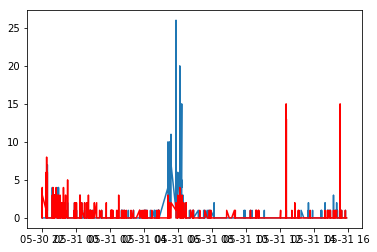

In [40]:
# Here is a function which converts date strings into datetime objects.
def get_date(date):
    date = datetime.strptime(date['$date'], '%Y-%m-%dT%H:%M:%S.%f+0200')
    return date

positive_count = 0
negative_count = 0
dicci = {}
dicci1 = {}
for n in jobj:
    k = n['created_at']
    d = get_date(k)
    score_found1 = get_sentiment_score(n['text'])
    if d in dicci:
        if score_found1 > 0:
            dicci[d] += 1
    else:
        dicci[d] = 0
dict31 = sorted(dicci.items(), key = lambda x : x[0], reverse=True)
dict31 = dict31[3:]

for n1 in jobj:
    k1 = n1['created_at']
    d1 = get_date(k1)
    score_found2 = get_sentiment_score(n1['text'])
    if d1 in dicci1:
        if score_found2 < 0:
            dicci1[d1] += 1
    else:
        dicci1[d1] = 0
dict311 = sorted(dicci1.items(), key = lambda x : x[0], reverse=True)
dict311 = dict311[3:]

x2,y2 = zip(*dict311)

x1,y1 = zip(*dict31)
plt.plot(x1,y1)
plt.plot(x2,y2,'r')
# YOUR CODE HERE

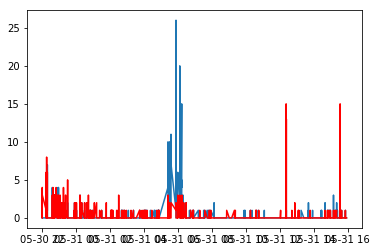

In [41]:
# Here is a function which converts date strings into datetime objects.
def get_date(date):
    date = datetime.strptime(date['$date'], '%Y-%m-%dT%H:%M:%S.%f+0200')
    return date

positive_count = 0
negative_count = 0
dicci = {}
dicci1 = {}
for n in jobj:
    k = n['created_at']
    d = get_date(k)
    score_found1 = get_negated_sentiment_score(n['text'])
    if d in dicci:
        if score_found1 > 0:
            dicci[d] += 1
    else:
        dicci[d] = 0
dict31 = sorted(dicci.items(), key = lambda x : x[0], reverse=True)
dict31 = dict31[3:]

for n1 in jobj:
    k1 = n1['created_at']
    d1 = get_date(k1)
    score_found2 = get_negated_sentiment_score(n1['text'])
    if d1 in dicci1:
        if score_found2 < 0:
            dicci1[d1] += 1
    else:
        dicci1[d1] = 0
dict311 = sorted(dicci1.items(), key = lambda x : x[0], reverse=True)
dict311 = dict311[3:]

x2,y2 = zip(*dict311)

x1,y1 = zip(*dict31)
plt.plot(x1,y1)
plt.plot(x2,y2,'r')